# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations - should provide about 1,000 cities across the world
lats = np.random.uniform(lat_range[0], lat_range[1], size=3500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=3500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

1129

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

..dan note- why would i sleep for 60 seconds after every 50 cities when i can sleep for 3 seconds after every 60 cities and still stay under the rate limit...the above suggestion slows the code down quite a bit 

I altered the code to pull over a thousand cities and this code runs faster.

In [8]:
city_names = []
countries = []
city_ids = []
dates = []
lats = []
longs = []
cloudiness = []
descriptions = []
temps = []
feels_likes = []
temp_mins = []
temp_maxes = []
pressures = []
humidities = []
vises = []
windspeeds = []
counter = 1
for city in cities:
    if counter%60 == 0:
        time.sleep(3)
    conn_string = "https://api.openweathermap.org/data/2.5/weather?q=" + str(city) + "&appid=" + weather_api_key + "&units=imperial"
    weather_response = requests.get(conn_string)
    weather_json = weather_response.json()
    try:
        str(weather_response) == "<Response [200]>"
        city_names.append(weather_json['name'])
        countries.append(weather_json['sys']['country'])
        city_ids.append(weather_json['id'])
        dates.append(weather_json['dt'])
        lats.append(weather_json['coord']['lat'])
        longs.append(weather_json['coord']['lon'])
        cloudiness.append(weather_json['clouds']['all'])
        descriptions.append(weather_json["weather"][0]['description'])
        temps.append(weather_json['main']['temp'])
        feels_likes.append(weather_json['main']['feels_like'])
        temp_mins.append(weather_json['main']['temp_min'])
        temp_maxes.append(weather_json['main']['temp_max'])
        pressures.append(weather_json['main']['pressure'])
        humidities.append(weather_json['main']['humidity'])
        vises.append(weather_json['visibility'])
        windspeeds.append(weather_json['wind']['speed'])
        print("Got Weather Data for city number " + str(counter) + " named " + str(city) + "." )
    except:
        print("Missing data for city number " + str(counter) + " named " + str(city) + ". :(" )  
    counter += 1
        
        

Got Weather Data for city number 1 named nemuro.
Got Weather Data for city number 2 named luganville.
Got Weather Data for city number 3 named balkanabat.
Got Weather Data for city number 4 named chokurdakh.
Got Weather Data for city number 5 named vaini.
Got Weather Data for city number 6 named khatanga.
Got Weather Data for city number 7 named new norfolk.
Got Weather Data for city number 8 named busselton.
Got Weather Data for city number 9 named jamestown.
Missing data for city number 10 named lolua. :(
Got Weather Data for city number 11 named sola.
Got Weather Data for city number 12 named tasiilaq.
Got Weather Data for city number 13 named sao joao da barra.
Got Weather Data for city number 14 named georgetown.
Got Weather Data for city number 15 named cabo san lucas.
Got Weather Data for city number 16 named neuquen.
Got Weather Data for city number 17 named rikitea.
Got Weather Data for city number 18 named longyearbyen.
Got Weather Data for city number 19 named caldas novas.


### Convert Raw Data to DataFrame
* Create Dataframe from data 
* Export the city data into a .csv.
* Display the DataFrame


In [9]:
weather_df = pd.DataFrame({'city': city_names,
                          'country': countries,
                          'city_id': city_ids,
                          'date': dates,
                          'latitude': lats,
                          'longitude': longs,
                           'cloudiness': cloudiness,
                          'description': descriptions,
                          'temperature': temps,
                          'feels_like': feels_likes,
                          'temp_min': temp_mins,
                          'temp_max': temp_maxes,
                          'humidity': humidities,
                          'visbility': vises,
                          'windspeed': windspeeds})
weather_df.to_csv('output_data/cities_output.csv', index = False, mode = 'w')
weather_df

,city,country,city_id,date,latitude,longitude,cloudiness,description,temperature,feels_like,temp_min,temp_max,humidity,visbility,windspeed
0,Nemuro,JP,2128975,1648789984,43.3236,145.5750,100,overcast clouds,29.59,20.52,29.59,29.59,77,10000,10.42
1,Luganville,VU,2136150,1648789984,-15.5333,167.1667,100,heavy intensity rain,83.08,92.17,83.08,83.08,82,10000,2.89
2,Balkanabat,TM,161616,1648789984,39.5108,54.3671,0,clear sky,60.35,57.69,60.35,60.35,34,10000,2.68
3,Chokurdakh,RU,2126123,1648789763,70.6333,147.9167,17,few clouds,-7.08,-15.47,-7.08,-7.08,94,10000,3.24
4,Vaini,TO,4032243,1648789749,-21.2000,-175.2000,75,broken clouds,80.76,88.61,80.76,80.76,94,10000,4.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,Presidencia Roque Sáenz Peña,AR,3840300,1648790413,-26.7852,-60.4388,3,clear sky,48.51,46.72,48.51,48.51,73,10000,4.59
1027,Langsa,ID,1214724,1648790413,4.4683,97.9683,86,overcast clouds,92.32,98.65,92.32,92.32,49,10000,3.58
1028,Oga,IT,3175788,1648790414,46.4631,10.3470,100,snow,32.72,28.29,29.97,36.81,97,144,4.61
1029,Pedernales,DO,3495137,1648790414,18.0384,-71.7440,9,clear sky,77.29,77.86,77.29,77.29,67,10000,5.91


In [10]:
# check if any cities have humidity above 100 and drop them from dataframeeeee
cities_hum_greater_100 = weather_df.index[weather_df['humidity'] > 100].tolist()
if len(cities_hum_greater_100) > 0:
    print('There are cities with over 100% humidity')
else:
    print("There are no cities with over 100% humidity")

There are no cities with over 100% humidity


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
#save today's date into a variable to be used in all the plot titles
date_of_df = time.strftime("%x")

## Latitude vs. Temperature Plot

Showing the temperatures across latitudes of 1,000 worldwide cities.
This data appears to show strong correlation between latitude and maximum recorded temperatures.


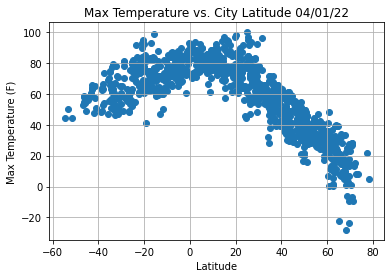

In [12]:
plt.scatter(weather_df['latitude'], weather_df['temp_max'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Max Temperature vs. City Latitude ' + date_of_df)
plt.grid(True)
plt.savefig("output_data/Latitude vs Temperature (F).png")
print(f'Showing the temperatures across latitudes of 1,000 worldwide cities.')
print(f'This data appears to show strong correlation between latitude and maximum recorded temperatures.')

## Latitude vs. Humidity Plot

Showing the humidity percentages across latitudes of 1,000 worldwide cities.
There appears to be no trends in this data.


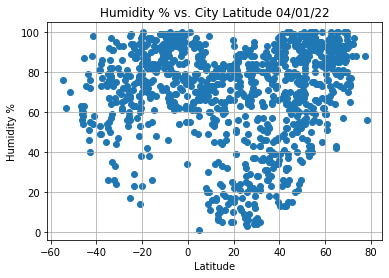

In [13]:
plt.scatter(weather_df['latitude'], weather_df['humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Humidity % vs. City Latitude ' + date_of_df)
plt.grid(True)
plt.savefig("output_data/Latitude vs Humidity %.png")
print(f'Showing the humidity percentages across latitudes of 1,000 worldwide cities.')
print(f'There appears to be no trends in this data.')

## Latitude vs. Cloudiness Plot

Showing the cloudiness across latitudes of 1,000 worldwide cities
There appears to be no trend here.


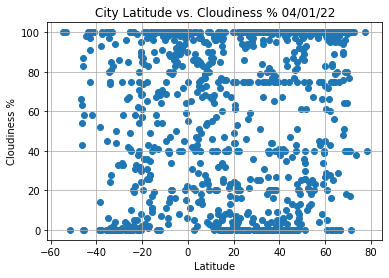

In [14]:
plt.scatter(weather_df['latitude'], weather_df['cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness % '+ date_of_df)
plt.grid(True)
plt.savefig("output_data/Latitude vs Cloudiness %.png")
print(f'Showing the cloudiness across latitudes of 1,000 worldwide cities')
print(f'There appears to be no trend here.')

## Latitude vs. Wind Speed Plot

Showing the windspeed across latitudes of 1,000 worldwide cities
There appears to be no trend here.


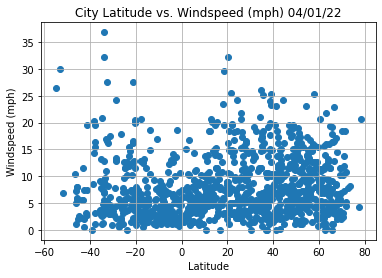

In [15]:
plt.scatter(weather_df['latitude'], weather_df['windspeed'])
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('City Latitude vs. Windspeed (mph) '+ date_of_df)
plt.grid(True)
plt.savefig("output_data/Latitude vs Windspeed (mph).png")
print(f'Showing the windspeed across latitudes of 1,000 worldwide cities')
print(f'There appears to be no trend here.')

## Linear Regression

In [17]:
# Finding the cities in the Northern Hemisphere
northern_cities_df = weather_df[weather_df['latitude'] > 0]

# Finding the cities in the Southern Hemisphere
southern_cities_df = weather_df[weather_df['latitude'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In the Northern Hemisphere, approx -90.7253666170706% of the cities have max temperatures that are correlated with latitudes.


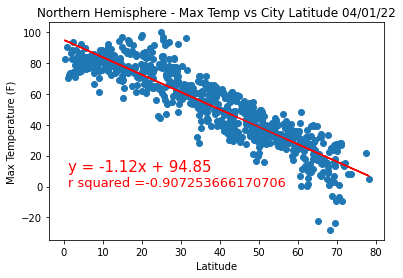

In [33]:
# Determining the linear regression of the plot
x = northern_cities_df['latitude']
y = northern_cities_df['temp_max']
(slope, intercept, rvalue, pvalue, stdder) = st.linregress(x, y)
regress_values = x*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plotting the scatter data for Max Temp vs. Latitude in the Northern Hemisphere
plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs City Latitude '+date_of_df)
plt.annotate(line_eq,(1,10),fontsize=15,color="red")
plt.annotate(f"r squared ={rvalue}",(1,0),fontsize=13,color="red")
plt.savefig("output_data/Northern Hemisphere - Max Temp (F) vs City Latitude.png")
print(f'In the Northern Hemisphere, approx ' + str(rvalue*100)+ '% of the cities have max temperatures that are correlated with latitudes.')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In the Southern Hemisphere, approx 58.728667724421115% of the cities have max temperatures that are correlated with latitudes.


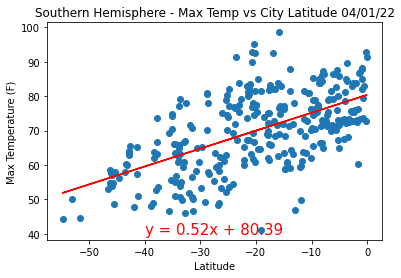

In [34]:
# Determining the linear regression of the plot
x1 = southern_cities_df['latitude']
y1 = southern_cities_df['temp_max']
(slope, intercept, rvalue, pvalue, stdder) = st.linregress(x1, y1)
regress_values = x1*slope + intercept
line_eq2 = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plotting the scatter data for Max Temp vs. Latitude in the Northern Hemisphere
plt.scatter(x1, y1)
plt.plot(x1, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs City Latitude '+date_of_df)
plt.annotate(line_eq2,(-40, 40),fontsize=15,color="red")
plt.annotate(f"r squared ={rvalue}",(-40,35),fontsize=13,color="red")
plt.savefig("output_data/Southern Hemisphere - Max Temp (F) vs City Latitude.png")
print(f'In the Southern Hemisphere, approx ' + str(rvalue*100)+ '% of the cities have max temperatures that are correlated with latitudes.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In the Northern Hemisphere, approx 32.910845571870325% of the cities have humidity levels that are correlated with latitudes.


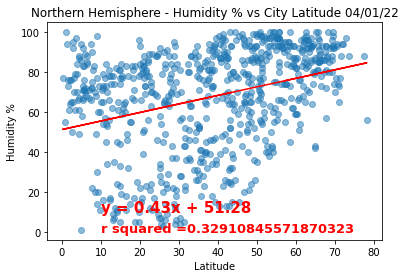

In [35]:
# Determining the linear regression of the plot
x2 = northern_cities_df['latitude']
y2 = northern_cities_df['humidity']
(slope, intercept, rvalue, pvalue, stdder) = st.linregress(x2, y2)
regress_values = x2*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plotting the scatter data for Max Temp vs. Latitude in the Northern Hemisphere
plt.scatter(x2, y2, alpha=0.5)
plt.plot(x2, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Northern Hemisphere - Humidity % vs City Latitude '+date_of_df)
plt.annotate(line_eq,(10,10),fontsize=15,color="red", weight='bold')
plt.annotate(f"r squared ={rvalue}",(10,0),fontsize=13,color="red", weight='bold')
plt.savefig("output_data/Northern Hemisphere - Humidity % vs City Latitude.png")
print(f'In the Northern Hemisphere, approx ' + str(rvalue*100)+ '% of the cities have humidity levels that are correlated with latitudes.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In the Northern Hemisphere, approx 36.54653571584937% of the cities have humidity levels that are correlated with latitudes.


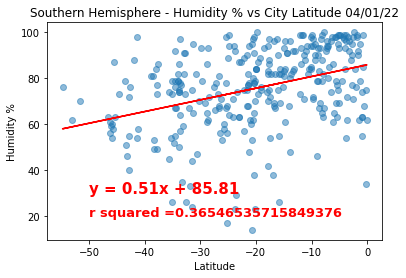

In [36]:
# Determining the linear regression of the plot
x3 = southern_cities_df['latitude']
y3 = southern_cities_df['humidity']
(slope, intercept, rvalue, pvalue, stdder) = st.linregress(x3, y3)
regress_values = x3*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plotting the scatter data for Max Temp vs. Latitude in the Northern Hemisphere
plt.scatter(x3, y3, alpha=0.5)
plt.plot(x3, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Southern Hemisphere - Humidity % vs City Latitude '+date_of_df)
plt.annotate(line_eq,(-50,30),fontsize=15,color="red", weight='bold')
plt.annotate(f"r squared ={rvalue}",(-50,20),fontsize=13,color="red", weight='bold')
plt.savefig("output_data/Southern Hemisphere - Humidity % vs City Latitude.png")
print(f'In the Northern Hemisphere, approx ' + str(rvalue*100)+ '% of the cities have humidity levels that are correlated with latitudes.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In the Northern Hemisphere, approx 24.22698925879203% of the cities have cloud coverages that are correlated with latitudes.


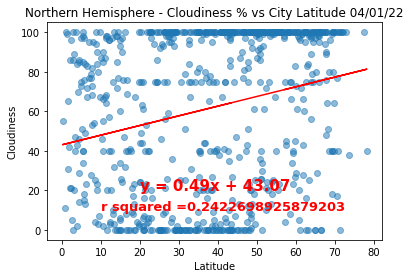

In [38]:
# Determining the linear regression of the plot
x4 = northern_cities_df['latitude']
y4 = northern_cities_df['cloudiness']
(slope, intercept, rvalue, pvalue, stdder) = st.linregress(x4, y4)
regress_values = x4*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plotting the scatter data for Max Temp vs. Latitude in the Northern Hemisphere
plt.scatter(x4, y4, alpha=0.5)
plt.plot(x4, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness % vs City Latitude '+date_of_df)
plt.annotate(line_eq,(20,20),fontsize=15,color="red", weight='bold')
plt.annotate(f"r squared ={rvalue}",(10,10),fontsize=13,color="red", weight='bold')
plt.savefig("output_data/Northern Hemisphere - Cloudiness % vs City Latitude.png")
print(f'In the Northern Hemisphere, approx ' + str(rvalue*100)+ '% of the cities have cloud coverages that are correlated with latitudes.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In the Southern Hemisphere, approx 22.690040655303036% of the cities have cloud coverages that are correlated with latitudes.


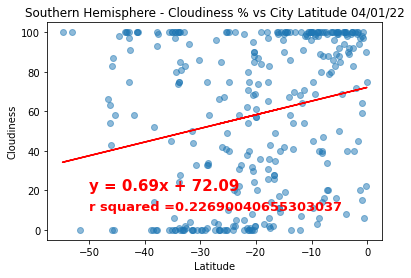

In [39]:
# Determining the linear regression of the plot
x5 = southern_cities_df['latitude']
y5 = southern_cities_df['cloudiness']
(slope, intercept, rvalue, pvalue, stdder) = st.linregress(x5, y5)
regress_values = x5*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plotting the scatter data for Max Temp vs. Latitude in the Northern Hemisphere
plt.scatter(x5, y5, alpha=0.5)
plt.plot(x5, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness % vs City Latitude '+date_of_df)
plt.annotate(line_eq,(-50,20),fontsize=15,color="red", weight='bold')
plt.annotate(f"r squared ={rvalue}",(-50,10),fontsize=13,color="red", weight='bold')
plt.savefig("output_data/Southern Hemisphere - Cloudiness % vs City Latitude.png")
print(f'In the Southern Hemisphere, approx ' + str(rvalue*100)+ '% of the cities have cloud coverages that are correlated with latitudes.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In the Northern Hemisphere, approx 6.862195259308905% of the cities have windspeeds that are correlated with latitudes.


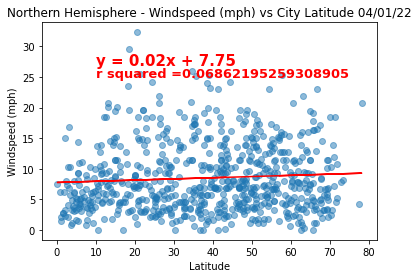

In [40]:
# Determining the linear regression of the plot
x6 = northern_cities_df['latitude']
y6 = northern_cities_df['windspeed']
(slope, intercept, rvalue, pvalue, stdder) = st.linregress(x6, y6)
regress_values = x6*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plotting the scatter data for Max Temp vs. Latitude in the Northern Hemisphere
plt.scatter(x6, y6, alpha=0.5)
plt.plot(x6, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Northern Hemisphere - Windspeed (mph) vs City Latitude '+date_of_df)
plt.annotate(line_eq,(10,27),fontsize=15,color="red", weight='bold')
plt.annotate(f"r squared ={rvalue}",(10,25),fontsize=13,color="red", weight='bold')
plt.savefig("output_data/Northern Hemisphere - Windspeed (mph) vs City Latitude.png")
print(f'In the Northern Hemisphere, approx ' + str(rvalue*100)+ '% of the cities have windspeeds that are correlated with latitudes.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In the Southern Hemisphere, approx -27.384398771154416% of the cities have windspeeds that are correlated with latitudes.


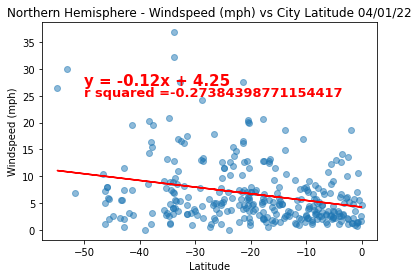

In [30]:
# Determining the linear regression of the plot
x7 = southern_cities_df['latitude']
y7 = southern_cities_df['windspeed']
(slope, intercept, rvalue, pvalue, stdder) = st.linregress(x7, y7)
regress_values = x7*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plotting the scatter data for Max Temp vs. Latitude in the Northern Hemisphere
plt.scatter(x7, y7, alpha=0.5)
plt.plot(x7, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Northern Hemisphere - Windspeed (mph) vs City Latitude '+date_of_df)
plt.annotate(line_eq,(-50,27),fontsize=15,color="red", weight='bold')
plt.annotate(f"r squared ={rvalue}",(-50,25),fontsize=13,color="red", weight='bold')
plt.savefig("output_data/Southern Hemisphere - Windspeed (mph) vs City Latitude.png")
print(f'In the Southern Hemisphere, approx ' + str(rvalue*100)+ '% of the cities have windspeeds that are correlated with latitudes.')